In [1]:
import pandas as pd
import numpy as np

In [2]:
forecast = pd.read_csv('wc_forecasts.csv')

In [3]:
matches = pd.read_csv('wc_matches.csv')

In [4]:
compare = pd.read_csv('world_cup_comparisons.csv')

In [8]:
matches.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2018-06-14,1908,FIFA World Cup,Russia,Saudi Arabia,70.14,51.33,0.6615,0.1200,0.2184,2.03,0.73,5,0,1.62,0.20,1.55,0.11,4.18,0.00
1,2018-06-15,1908,FIFA World Cup,Egypt,Uruguay,62.46,79.52,0.1845,0.5433,0.2723,0.82,1.61,0,1,0.42,1.94,0.65,1.94,0.00,1.05
2,2018-06-15,1908,FIFA World Cup,Morocco,Iran,72.33,65.57,0.4004,0.2667,0.3330,1.13,0.86,0,1,0.86,0.72,0.57,0.36,0.00,1.05
3,2018-06-15,1908,FIFA World Cup,Portugal,Spain,83.47,91.30,0.2459,0.4809,0.2732,1.07,1.60,3,3,1.15,1.63,0.80,2.59,3.15,3.15
4,2018-06-16,1908,FIFA World Cup,France,Australia,87.18,61.69,0.7694,0.0746,0.1560,2.61,0.69,2,1,1.38,1.03,1.24,0.39,2.10,1.05


In [6]:
compare.head()

,player,season,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,Cristian Pavón,2018,Argentina,-0.42,-0.55,0.08,-0.24,-0.61,-0.72,-0.05,0.15,0.30,-0.79,-0.80,-0.45,-0.23,-0.38,-0.91,-0.58
1,Eduardo Salvio,2018,Argentina,-0.42,-0.50,-0.51,0.64,0.02,-0.46,-0.05,0.48,0.61,0.67,0.32,-0.45,0.21,-1.11,0.68,-0.03
2,Enzo Pérez,2018,Argentina,-0.42,0.11,-0.51,-0.69,0.27,-0.65,-0.36,-0.34,0.35,-0.22,-0.80,-0.45,-0.89,0.72,0.04,-0.66
3,Federico Fazio,2018,Argentina,-0.42,-0.59,-0.51,-0.69,-0.97,-0.91,-0.67,-0.84,-0.82,-0.79,-0.64,-0.45,0.21,-1.11,-0.59,-0.77
4,Franco Armani,2018,Argentina,-0.42,-0.59,-0.51,-0.80,-0.67,0.64,-0.67,-0.67,-0.82,-0.79,-0.64,-0.45,-0.89,-1.11,-0.91,-0.77


In [9]:
matches.shape

(64, 20)

In [10]:
compare.shape

(5899, 19)

In [11]:
compare.corr()

,season,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
season,1.000000,-0.000178,0.000427,0.000614,0.000186,0.000020,-0.000112,-0.000391,-0.000050,0.000034,-0.000027,0.000214,-0.000067,-0.000073,0.000085,-0.000005,-0.000035
goals_z,-0.000178,1.000000,0.715159,0.136509,0.549355,0.038593,-0.096621,0.283687,0.181302,-0.003306,-0.039637,-0.131924,-0.047901,0.125330,0.139337,0.295691,0.347321
xg_z,0.000427,0.715159,1.000000,0.200664,0.731985,0.095736,-0.113149,0.369243,0.266979,0.012974,-0.025485,-0.172259,-0.071507,0.192633,0.215468,0.395978,0.470202
crosses_z,0.000614,0.136509,0.200664,1.000000,0.169591,0.314829,0.284997,0.384130,0.442854,0.174484,0.128561,-0.095868,-0.071318,-0.054417,0.151488,0.315540,0.763114
boxtouches_z,0.000186,0.549355,0.731985,0.169591,1.000000,0.017723,-0.193149,0.380900,0.248759,-0.010636,-0.051394,-0.177467,-0.081801,0.340596,0.254916,0.426758,0.494714
passes_z,0.000020,0.038593,0.095736,0.314829,0.017723,1.000000,0.770965,0.306166,0.590764,0.625204,0.631981,0.336034,0.333446,0.202827,0.371756,0.346557,0.389491
progpasses_z,-0.000112,-0.096621,-0.113149,0.284997,-0.193149,0.770965,1.000000,0.108445,0.383356,0.410353,0.437116,0.334224,0.237010,0.087246,0.147226,0.121767,0.229279
takeons_z,-0.000391,0.283687,0.369243,0.384130,0.380900,0.306166,0.108445,1.000000,0.624163,0.196440,0.138198,-0.133519,-0.072880,0.022646,0.248064,0.532060,0.589780
progruns_z,-0.000050,0.181302,0.266979,0.442854,0.248759,0.590764,0.383356,0.624163,1.000000,0.384338,0.353225,0.079509,0.123366,0.089654,0.283355,0.455540,0.561086
tackles_z,0.000034,-0.003306,0.012974,0.174484,-0.010636,0.625204,0.410353,0.196440,0.384338,1.000000,0.638684,0.336788,0.326078,0.196339,0.409855,0.250606,0.195379


In [15]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


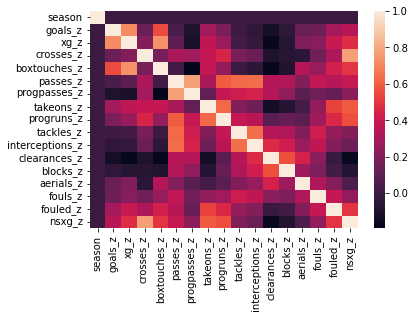

In [16]:
sns.heatmap(compare.corr());

In [40]:
comp = compare.drop(columns=['season'])

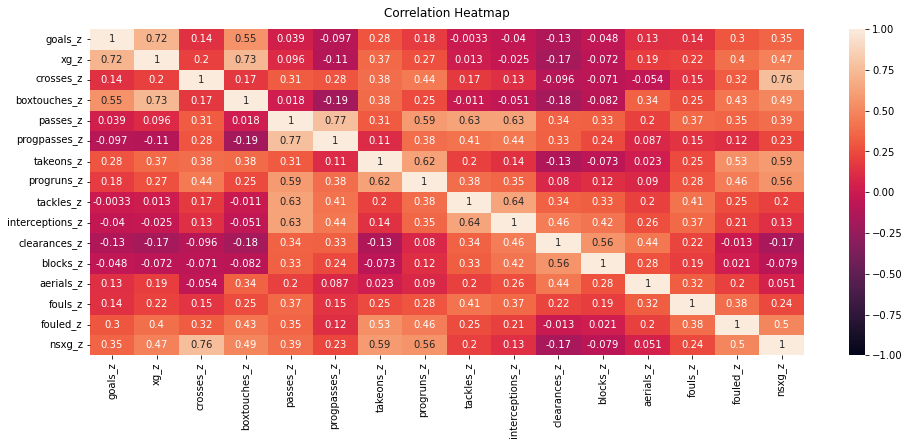

In [44]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you 
#want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, 
# and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(comp.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap.
#Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

correlations:
- nsxg_z & crosses_z = .76
- nsxg_z & boxtouches_z = .49
- nsxg & takeons = .59
- nsxg & progruns = .56
- nsxg & fouled = .5
- fouls & tackles = .41
- fouled & xg = .4
- fouled & boxtouches = .43
- fouled & takeons = .53
- fouled & progruns = .46
- aerials & clearances = .44
- blocks & interceptions = .42
- blocks_z & clearances = .56
- clearances & interceptions = .46
- clearances & aerials = .44
- interceptions & passes = .63
- interceptions & progpasses = .44
- interceptions & tackles = .64
- interceptions & clearances = .46
- interceptions & blocks = .42
- tackles & passes = ..63
- tackles & progpasses = .41
- progruns & crosses = .44
- progruns & passes = .59
- progruns & takeons = .62
- progpasses & passes = .77
- boxtouches & goasl = .55
- boxtouches & xg = .73
- xg & goals = .72


# Interesting:
- progpasses & passes = .77
- nsxg_z & crosses_z = .76
- boxtouches & xg = .73
- xg & goals = .72
- progruns & takeons = .62
- nsxg & takeons = .59
- progruns & passes = .59
- nsxg & progruns = .56
- boxtouches & goals = .55
- nsxg & fouled = .5
- nsxg_z & boxtouches_z = .49
- progruns & crosses = .44



In [45]:
# df = compare.drop(columns=['season'])

In [46]:
# df.corr()

In [47]:
# print(np.array(np.unique(df.goals_z, return_counts=True)))